In [313]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
from sklearn.linear_model import LinearRegression

In [314]:
path = "/home/bartleyby/Desktop/DATA ANALYTICS/PythonGit Repo/SupermarketSales/supermarket_sales - Sheet1.csv"

In [315]:
df = pd.read_csv(path)

In [316]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin %,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
2,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
3,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
4,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8


In [317]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin %', 'gross income', 'Rating'],
      dtype='object')

In [318]:
df.shape

(1000, 17)

In [319]:
df.dtypes

Invoice ID         object
Branch             object
City               object
Customer type      object
Gender             object
Product line       object
Unit price        float64
Quantity            int64
Tax 5%            float64
Total             float64
Date               object
Time               object
Payment            object
cogs              float64
gross margin %    float64
gross income      float64
Rating            float64
dtype: object

In [320]:
df['Branch'].unique()

array(['A', 'B', 'C'], dtype=object)

In [321]:
df['City'].unique()

array(['Yangon', 'Mandalay', 'Naypyitaw'], dtype=object)

In [322]:
df['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

In [323]:
df.isna().any()

Invoice ID        False
Branch            False
City              False
Customer type     False
Gender            False
Product line      False
Unit price        False
Quantity          False
Tax 5%            False
Total             False
Date              False
Time              False
Payment           False
cogs              False
gross margin %    False
gross income      False
Rating            False
dtype: bool

In [324]:
#visualizing null values
#sns.heatmap(df.isna())

In [325]:
df.duplicated().any()

False

In [326]:
df["Date"] = df["Date"].astype("datetime64[D]")

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Invoice ID      1000 non-null   object        
 1   Branch          1000 non-null   object        
 2   City            1000 non-null   object        
 3   Customer type   1000 non-null   object        
 4   Gender          1000 non-null   object        
 5   Product line    1000 non-null   object        
 6   Unit price      1000 non-null   float64       
 7   Quantity        1000 non-null   int64         
 8   Tax 5%          1000 non-null   float64       
 9   Total           1000 non-null   float64       
 10  Date            1000 non-null   datetime64[ns]
 11  Time            1000 non-null   object        
 12  Payment         1000 non-null   object        
 13  cogs            1000 non-null   float64       
 14  gross margin %  1000 non-null   float64       
 15  gross

In [328]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin %,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [329]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin %,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
2,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
3,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
4,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,14:36,Ewallet,413.04,4.761905,20.6520,5.8


finding which product line generated highest  sales by average

In [330]:
df_avg =df.groupby(['Product line'])["Total"].sum()
df_avg

Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64

Text(0.5, 1.0, 'sales per product line')

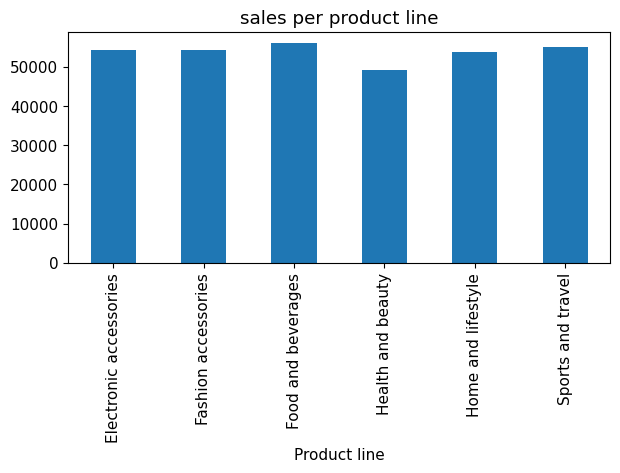

In [331]:
df_productline =df.groupby('Product line')['Total'].sum() 
plt.figure(figsize=(7,3))
df_productline.plot(kind='bar')
plt.title("sales per product line")

In [332]:
df_branch_sales =df.groupby('Branch')['Total'].sum() 
df_branch_sales

Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64

Text(0.5, 1.0, 'Total Sales by Branch')

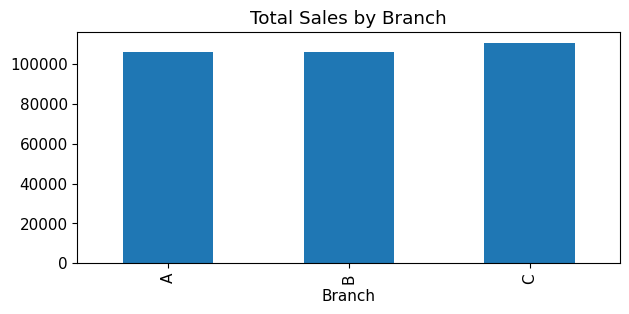

In [333]:
df_branch_sales =df.groupby('Branch')['Total'].sum() 
plt.figure(figsize=(7,3))
df_branch_sales.plot(kind='bar')
plt.title("Total Sales by Branch")

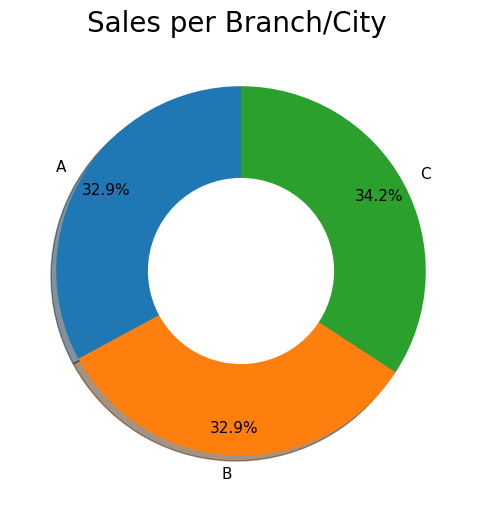

In [334]:
branch= df.groupby(['Branch'])['Total'].sum() 
plt.figure(figsize=(6,6))
labels = ['A','B','C']
plt.pie(branch, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, shadow =True)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=11)
plt.title("Sales per Branch/City ", fontsize=20)
plt.show()

Total sales by customer type

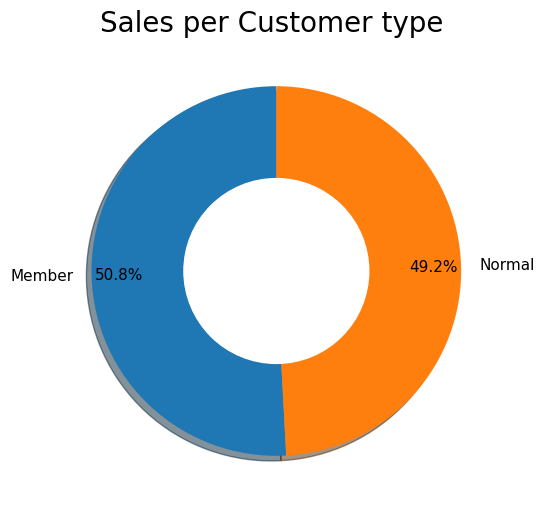

In [335]:
branch= df.groupby(['Customer type'])['Total'].sum() 
plt.figure(figsize=(6,6))
labels = ['Member', 'Normal']
plt.pie(branch, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, shadow =True)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=11)
plt.title("Sales per Customer type ", fontsize=20)
plt.show()

MODES OF PAYMENTS

In [336]:
df_payment =df['Payment'].value_counts() 
df_payment

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [337]:
plt.figure(figsize=(6,6))
labels = ['Ewallet','Cash','Credit card	']
values = df['Payment'].value_counts() 
mode_payment= px.pie(df , values=values, names=labels, 
             title='mode of payment', hole=0.5)

mode_payment.show()

<Figure size 600x600 with 0 Axes>

In [338]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin %,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4


In [339]:
df.index

RangeIndex(start=0, stop=1000, step=1)

<AxesSubplot: xlabel='Customer type', ylabel='count'>

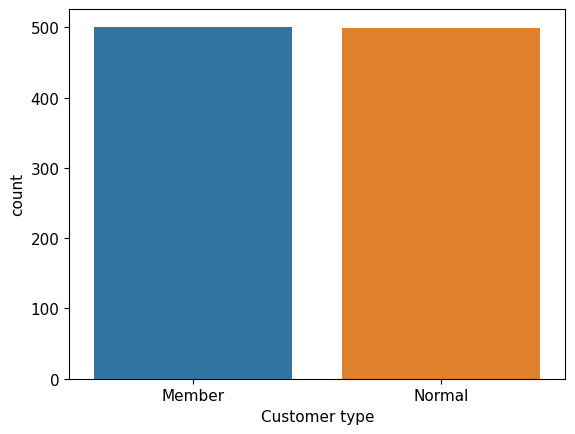

In [340]:
sn.countplot(x="Customer type", data=df)

<AxesSubplot: xlabel='Customer type', ylabel='count'>

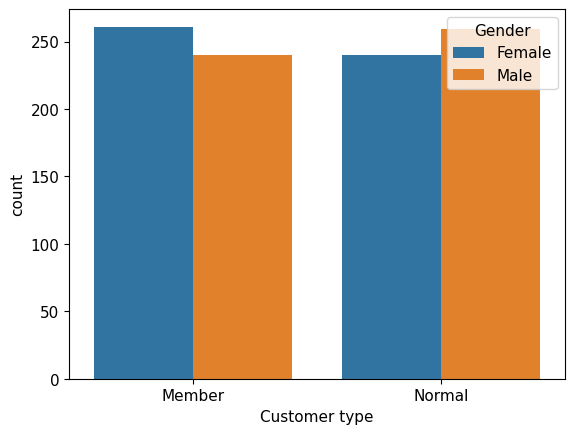

In [341]:
sn.countplot(x="Customer type", data=df, hue='Gender')

#preparing data for model
non numeric data to numeric


In [342]:
colm=["Invoice ID","City","Total","gross margin %","Date","Time"]
df = df.drop(columns=colm)
df.head(2)

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Payment,cogs,gross income,Rating
0,A,Member,Female,Health and beauty,74.69,7,26.1415,Ewallet,522.83,26.1415,9.1
1,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,Credit card,324.31,16.2155,7.4


["Customer type","Gender","Payment"]

In [343]:
#convertint gender to numeric values
cus_gen_dumy= pd.get_dummies(df,columns=["Customer type","Gender","Payment"],prefix="" ,drop_first=True)
#female=0, male = 1
cus_gen_dumy.head(3)

,Branch,Product line,Unit price,Quantity,Tax 5%,cogs,gross income,Rating,_Normal,_Male,_Credit card,_Ewallet
0,A,Health and beauty,74.69,7,26.1415,522.83,26.1415,9.1,0,0,0,1
1,A,Home and lifestyle,46.33,7,16.2155,324.31,16.2155,7.4,1,1,1,0
2,A,Health and beauty,58.22,8,23.2880,465.76,23.2880,8.4,0,1,0,1


In [344]:
#pd.get_dummies(df,columns=['Payment'],drop_first=True)

Droping none numeric columns and none essential

In [345]:
colm=["Branch","Product line"]
df_log = cus_gen_dumy.drop(columns=colm)
df_log.head(2)

,Unit price,Quantity,Tax 5%,cogs,gross income,Rating,_Normal,_Male,_Credit card,_Ewallet
0,74.69,7,26.1415,522.83,26.1415,9.1,0,0,0,1
1,46.33,7,16.2155,324.31,16.2155,7.4,1,1,1,0


In [346]:
#separate independent and dependent var
x= df_log[["Unit price","Quantity","Tax 5%","Rating","_Male","_Credit card","_Ewallet"]]

y= df_log["_Normal"]


In [347]:
x

,Unit price,Quantity,Tax 5%,Rating,_Male,_Credit card,_Ewallet
0,74.69,7,26.1415,9.1,0,0,1
1,46.33,7,16.2155,7.4,1,1,0
2,58.22,8,23.2880,8.4,1,0,1
3,86.31,7,30.2085,5.3,1,0,1
4,68.84,6,20.6520,5.8,0,0,1
...,...,...,...,...,...,...,...
995,99.96,7,34.9860,6.1,1,0,0
996,96.37,7,33.7295,6.0,1,0,0
997,82.34,10,41.1700,4.3,1,0,1
998,60.95,1,3.0475,5.9,0,0,1


In [348]:
y

0      0
1      1
2      0
3      1
4      0
      ..
995    1
996    1
997    0
998    0
999    1
Name: _Normal, Length: 1000, dtype: uint8

#Data modelling
model using logistic regression

In [349]:
#import train test split method
from sklearn.model_selection import train_test_split

In [350]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [351]:
#import logistic regression
from sklearn.linear_model import LogisticRegression


In [352]:
# fit logistic reg
lr = LogisticRegression()

In [353]:
lr.fit(x_train,y_train)

LogisticRegression()

In [354]:
#predict
predict  = lr.predict(x_test)

#Testing
# Evaluating the model
see how our model is performing


In [355]:
#printing a confusion matrix
from sklearn.metrics import confusion_matrix

In [356]:
pd.DataFrame(confusion_matrix(y_test,predict),columns=["Predicted No","Pridicted"],index =["Actual No","Actual Yes"])

,Predicted No,Pridicted
Actual No,82,82
Actual Yes,78,88


cheking the accuracy report
#classification report

In [357]:
from sklearn.metrics import classification_report

In [358]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.51      0.50      0.51       164
           1       0.52      0.53      0.52       166

    accuracy                           0.52       330
   macro avg       0.52      0.52      0.51       330
weighted avg       0.52      0.52      0.52       330



precision is not appealing. Accuracy can be increased by further using more features(which we droped earlier) and or using other model

note:
precision-> is the ratio of correctly predicted positive observations to the total predicted positive observations 

recall-> is the ratio of correctly predicted positive observations to the all observations in actual class F1 SCORE -   F1 SCORE is the weighted average of precision  and recall